In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split, TensorDataset
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
Min_Max = preprocessing.MinMaxScaler()
Ordinal =preprocessing.OrdinalEncoder()


def one_hot_cols(df,cols_to_one):
    one_hot=pd.get_dummies(df,cols_to_one,columns=cols_to_one)
    return one_hot


def fit_cols(df, cols_to_fit,fit_function ):
    for col in cols_to_fit:
        df[col] = pd.DataFrame(fit_function.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df


def split_Dataset(mypandas, cols_for_Y,size=0.2,state=1):
    
    X =  mypandas.drop(cols_for_Y, axis=1)
    Y = mypandas[cols_for_Y]
    X.head()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=state)
    return X_train.to_numpy(), X_test.to_numpy(), Y_train.to_numpy(), Y_test.to_numpy()

In [3]:
data_origin = pd.read_csv('./datasets/Churn_Modelling.csv')
dataset = data_origin.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
dataset= fit_cols(dataset,['Gender','Geography'],Ordinal)
dataset= fit_cols(dataset,dataset.columns,Min_Max)
dataset.head(20)



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0
5,0.590,1.0,1.0,0.351351,0.8,0.453394,0.333333,1.0,0.0,0.748797,1.0
6,0.944,0.0,1.0,0.432432,0.7,0.000000,0.333333,1.0,1.0,0.050261,0.0
7,0.052,0.5,0.0,0.148649,0.4,0.458540,1.000000,1.0,0.0,0.596733,1.0
8,0.302,0.0,1.0,0.351351,0.4,0.566170,0.333333,0.0,1.0,0.374680,0.0
9,0.668,0.0,1.0,0.121622,0.2,0.536488,0.000000,1.0,1.0,0.358605,0.0


In [4]:
X_train, X_test, Y_train, Y_test = split_Dataset(dataset,['Exited'])
print(np.shape(X_train),np.shape(Y_train))
print(np.shape(X_test),np.shape(Y_test))

(8000, 10) (8000, 1)
(2000, 10) (2000, 1)


In [5]:
print("X Train: {}, X Test: {}, y_train: {}, y_test: {}".format(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape))

X Train: (8000, 10), X Test: (2000, 10), y_train: (8000, 1), y_test: (2000, 1)


In [6]:
n_entradas = X_train.shape[1]
Y_train

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

# Tensores
Para poder procesar los datos en la red neuronal necesitamos que todos los datos estén en tensores, asi que haremos las conversiones necesarias

In [28]:
t_X_train = torch.from_numpy(X_train).float().to("cpu") #MPS #cuda
t_X_test = torch.from_numpy(X_test).float().to("cpu")
t_y_train = torch.from_numpy(Y_train).float().to("cpu")
t_y_test = torch.from_numpy(Y_test).float().to("cpu")
#t_y_train = t_y_train[:,None]
#t_y_test = t_y_test[:, None]


In [10]:
test = TensorDataset(t_X_test, t_y_test)
print(test[0])

(tensor([0.4000, 0.0000, 1.0000, 0.3919, 0.2000, 0.0000, 0.3333, 1.0000, 1.0000,
        0.4853]), tensor([0.]))


In [11]:
t_X_train

tensor([[0.5560, 0.5000, 1.0000,  ..., 0.0000, 1.0000, 0.6237],
        [0.5520, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.2055],
        [0.5240, 0.5000, 0.0000,  ..., 1.0000, 1.0000, 0.2287],
        ...,
        [0.6440, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 0.4601],
        [0.6260, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 0.5058],
        [0.8260, 0.5000, 1.0000,  ..., 1.0000, 0.0000, 0.1673]])

# Estructura de la red neuronal
Ahora vamos a armar una estructura básica de una red neuronal la cual va a recibir los datos de **X** para eventualmente poder predecir **y**

Para hacer esto tenemos que crear una Clase la cual hereda de nn.Module de torch.

In [33]:
class Red(nn.Module):
    
    def __init__(self, n_entradas):
        super(Red, self).__init__()
        self.linear1 = nn.Linear(n_entradas, 15)
        self.linear2 = nn.Linear(15, 8)
        self.linear3 = nn.Linear(8, 1)
    
    def forward(self, inputs):
        pred_1 = torch.sigmoid(input=self.linear1(inputs))
        pred_2 = torch.sigmoid(input=self.linear2(pred_1))
        pred_f = torch.sigmoid(input=self.linear3(pred_2))
        return pred_f


In [30]:
t_X_train.shape
t_y_train.shape

torch.Size([8000, 1])

In [2]:
%%time
lr = 0.002
epochs = 8000
estatus_print = 100

model = Red(n_entradas=n_entradas)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)
print("Arquitectura del modelo: {}".format(model))
historico = pd.DataFrame()

print("Entranando el modelo")
for epoch in range(1, epochs+1):
    y_pred= model(t_X_train)
    loss = loss_fn(input=y_pred, target=t_y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % estatus_print == 0:
        print(f"\nEpoch {epoch} \t Loss: {round(loss.item(), 4)}")
    
    with torch.no_grad():
        y_pred = model(t_X_test)
        y_pred_class = y_pred.round()
        correct = (y_pred_class == t_y_test).sum()
        accuracy = 100 * correct / float(len(t_y_test))
        if epoch % estatus_print == 0:
            print("Accuracy: {}".format(accuracy.item()))
    
    df_tmp = pd.DataFrame(data={
        'Epoch': epoch,
        'Loss': round(loss.item(), 4),
        'Accuracy': round(accuracy.item(), 4)
    }, index=[0])
    historico = pd.concat(objs=[historico, df_tmp], ignore_index=True, sort=False)

print("Accuracy final: {}".format(round(accuracy.item(), 4)))

NameError: name 'Red' is not defined

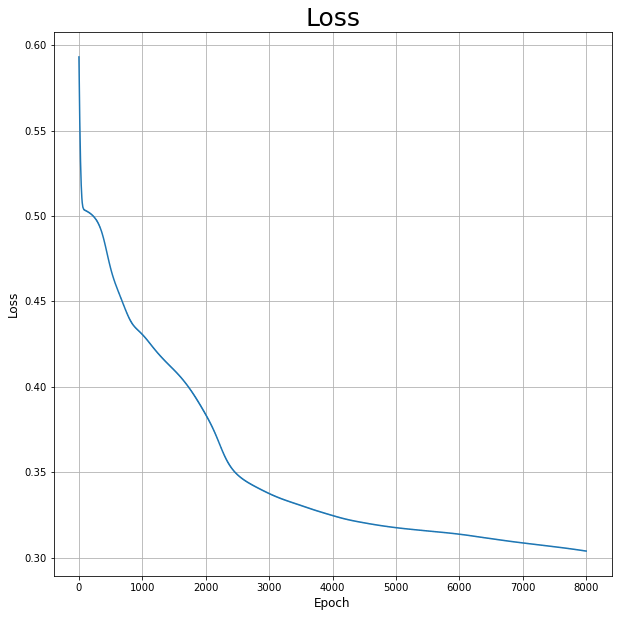

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
plt.plot(historico['Epoch'], historico['Loss'], label='Loss')
plt.title("Loss", fontsize=25)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.grid()
plt.show()

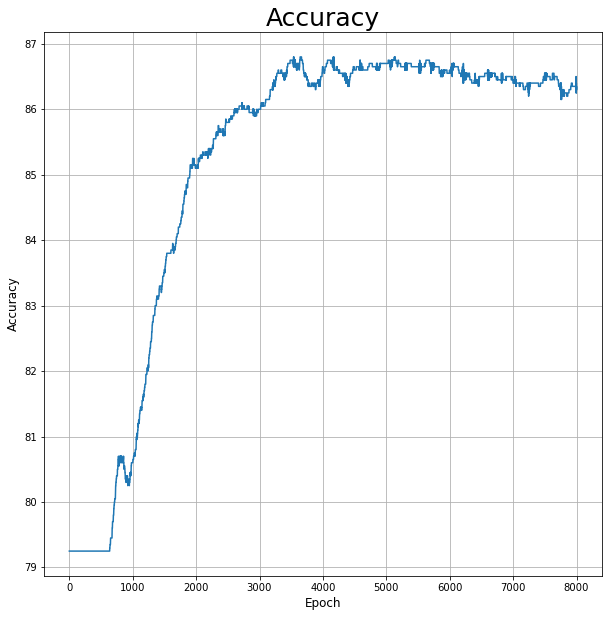

In [38]:
plt.figure(figsize=(10, 10))
plt.plot(historico['Epoch'], historico['Accuracy'], label='Accuracy')
plt.title("Accuracy", fontsize=25)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid()
plt.show()

In [17]:
t_X_test[1500]

tensor([0.6260, 0.0000, 1.0000, 0.3784, 0.3000, 0.0000, 0.3333, 0.0000, 1.0000,
        0.8814])

In [18]:
prediccion = model(t_X_test[1500])
print(prediccion)

tensor([0.0587], grad_fn=<SigmoidBackward0>)


In [19]:
t_y_test[1500]

tensor([0.])